In [5]:
import matplotlib.pyplot as plt
from data_generation import MEANS, VARIANCES, KEY, generate_mv_data, NUM_SAMPLES
from plot_utils import plot_scatter, plot_circles, plot_metrics
from train_utils import SimpleDnn, Encoder, Linear_Encoder, create_loaders
import torch
from torch.utils.data import TensorDataset
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger
import torch.nn.functional as F
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import plotly.express as px
from csv_utils import format_csv

BATCH_SIZE = 32

1. Generate linear data from three Gaussians

In [6]:
data, labels = generate_mv_data(KEY, MEANS, VARIANCES, NUM_SAMPLES, 3)

In [7]:
# linear data
labels_one_hot = F.one_hot(torch.Tensor(np.hstack((np.array(labels)))).to(torch.int64), num_classes=3).float() 
data_linear = TensorDataset(
                torch.Tensor(np.vstack((np.array(data)))), labels_one_hot
            )
train_loader_linear, val_loader_linear = create_loaders(data = data_linear, ratio = 0.8, num_workers = 0, shuffle_train = True, shuffle_val = False, batch_size = 32)

2023-04-02 13:43:13.932 | INFO     | train_utils:create_loaders:43 - Creating dataloaders with 80/20train/test split 🔪
2023-04-02 13:43:13.942 | INFO     | train_utils:create_loaders:66 - Successfully created train and validation loader 🤗


In [8]:
simple_dnn = SimpleDnn(Encoder(input_dim = 2, output_dim = 3), task_type = 'classification')
csv_logger = CSVLogger(save_dir='metrics_csv', name = 'linear')
# train model on linear data
trainer = pl.Trainer(logger=csv_logger, max_epochs = 50, log_every_n_steps=20)
trainer.fit(model=simple_dnn, train_dataloaders = train_loader_linear, val_dataloaders = val_loader_linear)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type          | Params
------------------------------------------
0 | encoder | Encoder       | 63    
1 | f1      | BinaryF1Score | 0     
------------------------------------------
63        Trainable params
0         Non-trainable params
63        Total params
0.000     Total estimated model params size (MB)


Epoch 36:  55%|█████▌    | 21/38 [00:00<00:00, 99.12it/s, v_num=0]          

/Users/clarahoffmann/Documents/code/pycon_2023_honey_i_broke_the_pytorch_model/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [11]:
format_csv('metrics_csv/linear/version_0/metrics.csv', ['train_loss', 'val_loss'], Path('reformatted_metrics/linear_data.csv'))

In [12]:
df = pd.read_csv('reformatted_metrics/linear_data.csv')

In [13]:
px.line(
          df,
          x='epoch',
          y='metric',
          color='label',
          )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'label=train<br>epoch=%{x}<br>metric=%{y}<extra></extra>',
              'legendgroup': 'train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  2,  3,  5,  6,  8,  9, 11, 13, 14, 16, 17, 19, 21, 22, 24, 25, 27,
                          28, 30, 32, 33, 35]),
              'xaxis': 'x',
              'y': array([0.79646713, 0.59628046, 0.44105744, 0.40645561, 0.41431546, 0.40632054,
                          0.24226546, 0.28155613, 0.22067082, 0.29479504, 0.29519793, 0.23904908,
                          0.19403677, 0.22343105, 0.24755885, 0.25096449, 0.15334934, 0.13766466,
                          0.11097234, 0.15395653, 0.27272806, 0.21261269, 0.14659999]),
              'yaxis': 'y'},
             {'hovertemplate': 'label=val_loss<br>epoch=%{x}<br>metric=%{y}<extra></extra>',
              'legendgroup': 'val_loss',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'val_loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
              'xaxis': 'x',
              'y': array([0.68176991, 0.60748309, 0.54707998, 0.49779272, 0.45694825, 0.42406374,
                          0.39775741, 0.37614748, 0.35805365, 0.34263015, 0.32888803, 0.31596941,
                          0.30431136, 0.29328933, 0.2831158 , 0.27352047, 0.26484811, 0.25699955,
                          0.24982432, 0.24337657, 0.23768845, 0.23240219, 0.22748166, 0.22326908,
                          0.21912959, 0.21549001, 0.21208639, 0.20886382, 0.20582937, 0.20306855,
                          0.20046109, 0.19778585, 0.19532898, 0.19304097, 0.19071791, 0.18853582]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'label'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'metric'}}}
})

In [49]:
def format_csv(csv_path: str, metric_list: list[str], output_path: Path) -> pd.DataFrame:

    """
    Reformat csv files to be used in plotly. 
    """

    metrics_df = pd.read_csv(csv_path)

    df_list = []
    for metric in metric_list:
        if metric == 'train_loss':
            epochs = metrics_df[~metrics_df['train_loss'].isnull()]["epoch"][::3]
            train_loss = metrics_df[~metrics_df['train_loss'].isnull()]['train_loss'][::3]
            df = pd.DataFrame({'epoch': epochs, 'metric': train_loss, 'label': 'train'})
            df_list.append(df)
        else:
            epochs_metric = metrics_df[~metrics_df['val_loss'].isnull()]["epoch"]
            metric_value = metrics_df[~metrics_df['val_loss'].isnull()]['val_loss']
            df = pd.DataFrame({'epoch': epochs_metric, 'metric': metric_value, 'label': metric})
            df_list.append(df)

    formatted_metrics_df = pd.concat(df_list)
    return formatted_metrics_df

In [50]:
df_test = format_csv('metrics_csv/linear/version_0/metrics.csv', ['train_loss', 'val_loss'], Path('torch_examples/reformatted_metrics/linear_data.csv'))

In [51]:
px.line(
          df_test,
          x='epoch',
          y='metric',
          color='label',
          )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'label=train<br>epoch=%{x}<br>metric=%{y}<extra></extra>',
              'legendgroup': 'train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  2,  3,  5,  6,  8,  9, 11, 13, 14, 16, 17, 19, 21, 22, 24, 25, 27,
                          28, 30, 32, 33, 35, 36, 38, 39, 41, 43, 44, 46, 47, 49]),
              'xaxis': 'x',
              'y': array([0.67505962, 0.58394206, 0.49174476, 0.4624382 , 0.33782563, 0.3599731 ,
                          0.321426  , 0.29911944, 0.22500367, 0.24355961, 0.30531895, 0.13639052,
                          0.29168898, 0.21747892, 0.1727515 , 0.13464858, 0.15104164, 0.20868321,
                          0.21563359, 0.18275671, 0.12026177, 0.11379811, 0.12892435, 0.09986514,
                          0.10779747, 0.20958717, 0.08778163, 0.13422772, 0.10857885, 0.23666809,
                          0.12006006, 0.07723251]),
              'yaxis': 'y'},
             {'hovertemplate': 'label=val_loss<br>epoch=%{x}<br>metric=%{y}<extra></extra>',
              'legendgroup': 'val_loss',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'val_loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
              'xaxis': 'x',
              'y': array([0.656358  , 0.59893185, 0.54390019, 0.49103251, 0.44270331, 0.40048081,
                          0.36407515, 0.33258864, 0.30483374, 0.28032017, 0.25854883, 0.24063449,
                          0.22481821, 0.2122816 , 0.20236869, 0.19427274, 0.18731232, 0.18114527,
                          0.17572653, 0.17092329, 0.16641949, 0.16218247, 0.15854682, 0.15510225,
                          0.15156187, 0.14842403, 0.14532931, 0.14246856, 0.13964641, 0.13687944,
                          0.13436233, 0.13185622, 0.12946521, 0.1270808 , 0.1247309 , 0.12282895,
                          0.12061601, 0.11870726, 0.11675157, 0.11506318, 0.11307272, 0.1115441 ,
                          0.10973333, 0.10819982, 0.10697694, 0.10536963, 0.10424187, 0.10289413,
                          0.10140993, 0.1002754 ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'label'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'metric'}}}
})

In [23]:
epochs = metrics_df[~metrics_df['train_loss'].isnull()]["epoch"][::3]
train_loss = metrics_df[~metrics_df['train_loss'].isnull()]['train_loss'][::3]

epochs_val = metrics_df[~metrics_df['val_loss'].isnull()]["epoch"]
val_loss = metrics_df[~metrics_df['val_loss'].isnull()]['val_loss']

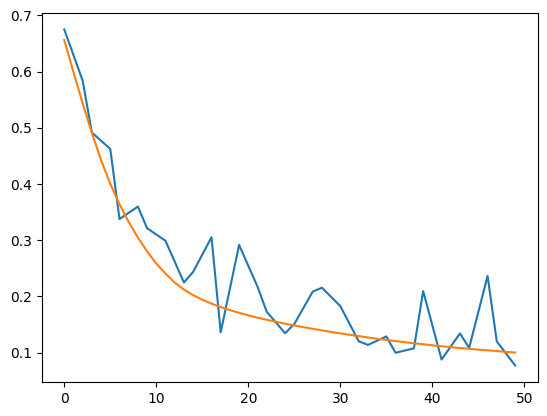

In [27]:
plt.plot(epochs, train_loss)
plt.plot(epochs_val, val_loss)

In [36]:
df1 = pd.DataFrame({'epoch': epochs_val, 'loss': val_loss, 'label': 'val'})
df2 = pd.DataFrame({'epoch': epochs, 'loss': train_loss, 'label': 'train'})

In [37]:
df = pd.concat([df1, df2])

In [41]:
px.line(
          df,
          x='epoch',
          y='loss',
          color='label',
          )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'label=val<br>epoch=%{x}<br>loss=%{y}<extra></extra>',
              'legendgroup': 'val',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'val',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
              'xaxis': 'x',
              'y': array([0.656358  , 0.59893185, 0.54390019, 0.49103251, 0.44270331, 0.40048081,
                          0.36407515, 0.33258864, 0.30483374, 0.28032017, 0.25854883, 0.24063449,
                          0.22481821, 0.2122816 , 0.20236869, 0.19427274, 0.18731232, 0.18114527,
                          0.17572653, 0.17092329, 0.16641949, 0.16218247, 0.15854682, 0.15510225,
                          0.15156187, 0.14842403, 0.14532931, 0.14246856, 0.13964641, 0.13687944,
                          0.13436233, 0.13185622, 0.12946521, 0.1270808 , 0.1247309 , 0.12282895,
                          0.12061601, 0.11870726, 0.11675157, 0.11506318, 0.11307272, 0.1115441 ,
                          0.10973333, 0.10819982, 0.10697694, 0.10536963, 0.10424187, 0.10289413,
                          0.10140993, 0.1002754 ]),
              'yaxis': 'y'},
             {'hovertemplate': 'label=train<br>epoch=%{x}<br>loss=%{y}<extra></extra>',
              'legendgroup': 'train',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  2,  3,  5,  6,  8,  9, 11, 13, 14, 16, 17, 19, 21, 22, 24, 25, 27,
                          28, 30, 32, 33, 35, 36, 38, 39, 41, 43, 44, 46, 47, 49]),
              'xaxis': 'x',
              'y': array([0.67505962, 0.58394206, 0.49174476, 0.4624382 , 0.33782563, 0.3599731 ,
                          0.321426  , 0.29911944, 0.22500367, 0.24355961, 0.30531895, 0.13639052,
                          0.29168898, 0.21747892, 0.1727515 , 0.13464858, 0.15104164, 0.20868321,
                          0.21563359, 0.18275671, 0.12026177, 0.11379811, 0.12892435, 0.09986514,
                          0.10779747, 0.20958717, 0.08778163, 0.13422772, 0.10857885, 0.23666809,
                          0.12006006, 0.07723251]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'label'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'loss'}}}
})